In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from math import exp,log

warnings.filterwarnings( "ignore" )
np.random.seed(1)

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
myData = pd.read_csv("/content/drive/MyDrive/ML Assignment2/dataset_NN.csv")

X = myData.iloc[:,:-1]
y = myData.iloc[:,-1:]

myData = (X - X.min()) / (X.max() - X.min())
myData["class"] = y


In [31]:
train_data = myData.sample(frac = 0.7).reset_index(drop = True)
test_data = myData.drop(train_data.index).reset_index(drop = True)
train_data = train_data.reset_index(drop = True)

In [32]:
num_of_hidden_nodes = 14
num_of_output_nodes = 10
num_of_attributes = train_data.shape[1] - 1
rows = train_data.shape[0]

wh = np.random.randn(num_of_attributes, num_of_hidden_nodes)
bh = np.random.randn(1, num_of_hidden_nodes)
wo = np.random.randn(num_of_hidden_nodes, num_of_output_nodes)
bo = np.random.randn(1, num_of_output_nodes)

In [33]:
learning_rate = 0.0001
loss_list = []
x_values = []
accuracy = []

In [34]:
def ReLU(x):
    return np.maximum(x, 0)

In [35]:
def der_ReLU(x):
    x[x <= 0] = 0 
    x[x > 0] = 1
    return x

In [36]:
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis = 1, keepdims = True)

In [37]:
xi = np.array(train_data.iloc[:,:-1].values)
value = train_data.iloc[:,-1:].values
one_hot_labels = np.zeros((rows,num_of_output_nodes))
for i in range(rows):
    one_hot_labels[i, value[i][0]-1] = 1

In [38]:
for itr in range(50001):
    zh = np.dot(xi,wh) + bh
    ah = ReLU(zh)
    zo = np.dot(ah,wo) + bo 
    ao = softmax(zo)
    dcost_dzo = ao - one_hot_labels
    dcost_dwo = np.dot(ah.T,dcost_dzo)
    
    wo -= learning_rate * dcost_dwo 
    bo -= learning_rate * dcost_dzo.sum(axis = 0)
    
    dcost_dah = np.dot(dcost_dzo,wo.T)
    dcost_dzh = dcost_dah * der_ReLU(zh)
    dcost_dwh = np.dot(xi.T,dcost_dzh)
    
    wh -= learning_rate * dcost_dwh
    bh -= learning_rate * dcost_dzh.sum(axis = 0)

    if itr % 1000 == 0:
        loss = np.sum(-one_hot_labels * np.log(ao))
        loss /= rows
        print('Iteration No:',itr,'Loss function value: ', loss)
        loss_list.append(loss)
        x_values.append(itr)
        count = 0
        for k in range(rows):
            if np.argmax(one_hot_labels[k]) == np.argmax(ao[k]):
                count += 1
        accuracy.append((count*100) / rows)
        print((count*100) / rows)

Iteration No: 0 Loss function value:  3.090901186855344
18.142857142857142
Iteration No: 1000 Loss function value:  0.7390997202497145
71.92857142857143
Iteration No: 2000 Loss function value:  0.679408917360623
74.28571428571429
Iteration No: 3000 Loss function value:  0.644066155430432
75.14285714285714
Iteration No: 4000 Loss function value:  0.6166652933313556
76.78571428571429
Iteration No: 5000 Loss function value:  0.597138047552017
77.14285714285714
Iteration No: 6000 Loss function value:  0.5837333927932083
77.35714285714286
Iteration No: 7000 Loss function value:  0.5749265671920037
77.35714285714286
Iteration No: 8000 Loss function value:  0.5686624336862863
77.35714285714286
Iteration No: 9000 Loss function value:  0.5641672885063552
77.28571428571429
Iteration No: 10000 Loss function value:  0.5608102561814368
77.28571428571429
Iteration No: 11000 Loss function value:  0.5579329426725661
77.5
Iteration No: 12000 Loss function value:  0.555672577162904
77.71428571428571
Ite

Accuracy on testing data:  70.5


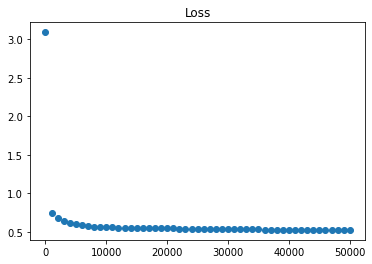

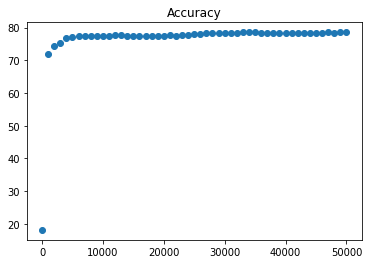

In [39]:
rows = test_data.shape[0]

xi = np.array(test_data.iloc[:,:-1].values)
value = test_data.iloc[:,-1:].values
one_hot_labels = np.zeros((rows,num_of_output_nodes))
for i in range(rows):
    one_hot_labels[i, value[i][0]-1] = 1
    
zh = np.dot(xi,wh) + bh
ah = ReLU(zh)
zo = np.dot(ah,wo) + bo
ao = softmax(zo)
count = 0

#Accuracy on testing data
for k in range(rows): 
    if np.argmax(one_hot_labels[k]) == np.argmax(ao[k]):
        count += 1
print('Accuracy on testing data: ', (count*100) / rows)


plt.scatter(x_values,loss_list)
plt.title("Loss")
plt.show()
plt.scatter(x_values,accuracy)
plt.title("Accuracy")
plt.show()